# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import matplotlib as mlp
import numpy as np
import operator as op
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prakhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('spamdata.csv')

In [5]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['Category'].value_counts()

0    4516
1     641
2       1
Name: Category, dtype: int64

In [7]:
df = df.loc[~((df['Category'] == 2))]

In [8]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

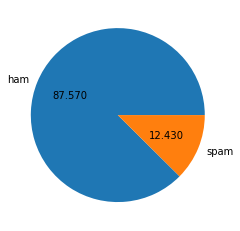

In [9]:
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [10]:
df['charcount']=df['Message'].apply(len)
df.head()

,Category,Message,charcount
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
df['wordcount']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [12]:
df.head()

,Category,Message,charcount,wordcount
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [13]:
df['sentcount']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,charcount,wordcount,sentcount
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
spamdf = df[df["Category"]==1]
spamdf

,Category,Message,charcount,wordcount,sentcount
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4
8,1,WINNER!! As a valued network customer you have...,157,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5125,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5127,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,38,6
5134,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5151,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [15]:
hamdf = df[df["Category"]==0]
hamdf

,Category,Message,charcount,wordcount,sentcount
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5150,0,Huh y lei...,12,4,1
5153,0,Will ü b going to esplanade fr home?,36,9,1
5154,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5155,0,The guy did some bitching but I acted like i'd...,125,27,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   5157 non-null   int64 
 1   Message    5157 non-null   object
 2   charcount  5157 non-null   int64 
 3   wordcount  5157 non-null   int64 
 4   sentcount  5157 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 241.7+ KB


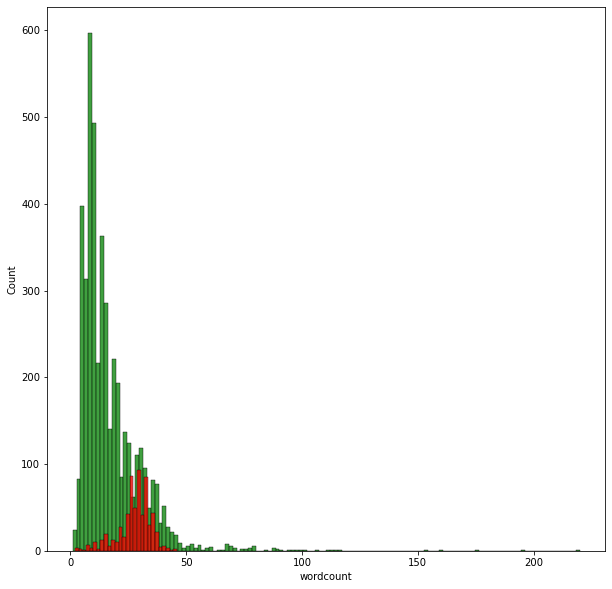

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['Category']==0]['wordcount'],color='green')
sns.histplot(df[df['Category']==1]['wordcount'],color='red')

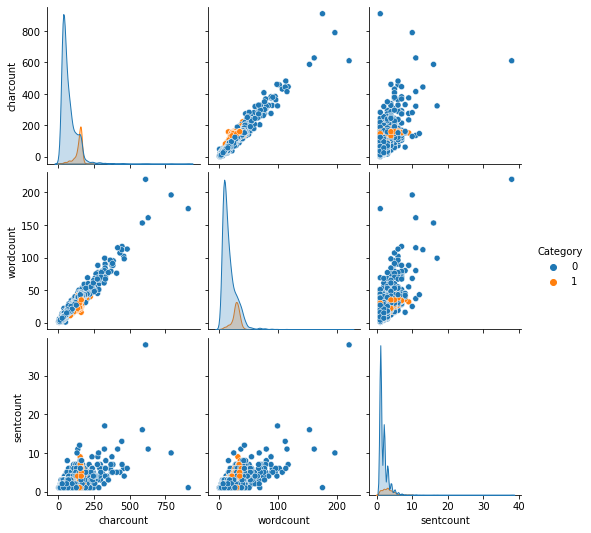

In [18]:
sns.pairplot(df,hue='Category')

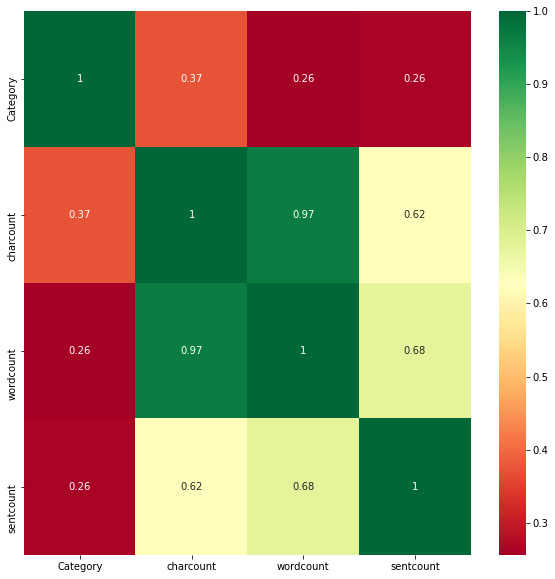

In [19]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Data Cleaning

In [20]:
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [21]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Message'] = df['Message'].apply(remove_special_characters)

In [22]:
from nltk.tokenize.toktok import ToktokTokenizer
#Tokenization of text
tokenizer=ToktokTokenizer()
#removing the stopwords
def cleantxt(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    ps = PorterStemmer()
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [ps.stem(token) for token in tokens if token not in set(stopwords.words('english'))]
    else:
        filtered_tokens = [ps.stem(token) for token in tokens if token.lower() not in set(stopwords.words('english'))]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Message'] = df['Message'].apply(cleantxt)

In [23]:
df.head()

,Category,Message,charcount,wordcount,sentcount
0,0,Go jurong point crazi avail bugi n great world...,111,24,2
1,0,Ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win FA cup final tkt 21...,155,37,2
3,0,U dun say earli hor U c alreadi say,49,13,1
4,0,nah dont think goe usf live around though,61,15,1


In [24]:
from wordcloud import WordCloud

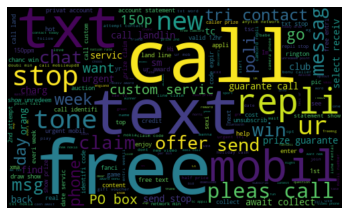

In [25]:
allWords = ' '.join([words for words in df[df['Category'] == 1]['Message']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show() #spam

In [26]:
spamcorpus = []
for msg in df[df['Category'] == 1]['Message'].tolist():
    for w in msg.split():
        spamcorpus.append(w)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


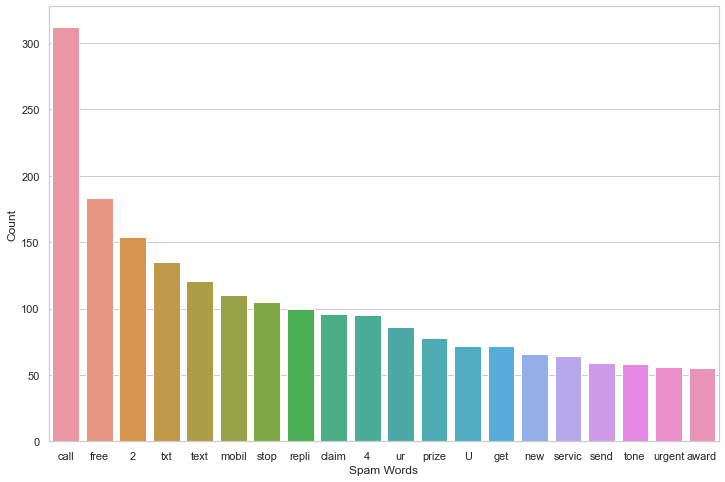

In [27]:
from collections import Counter
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
ax=sns.barplot(pd.DataFrame(Counter(spamcorpus).most_common(20))[0],pd.DataFrame(Counter(spamcorpus).most_common(20))[1])
plt.xticks(rotation='horizontal')
ax.set(ylabel = "Count")
ax.set(xlabel = "Spam Words")
plt.show()

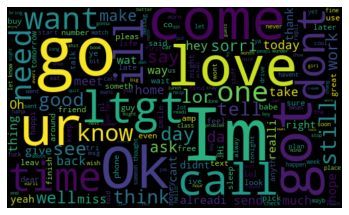

In [28]:
allWords = ' '.join([words for words in df[df['Category'] == 0]['Message']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
hamcorpus = []
for msg in df[df['Category'] == 0]['Message'].tolist():
    for w in msg.split():
        hamcorpus.append(w)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


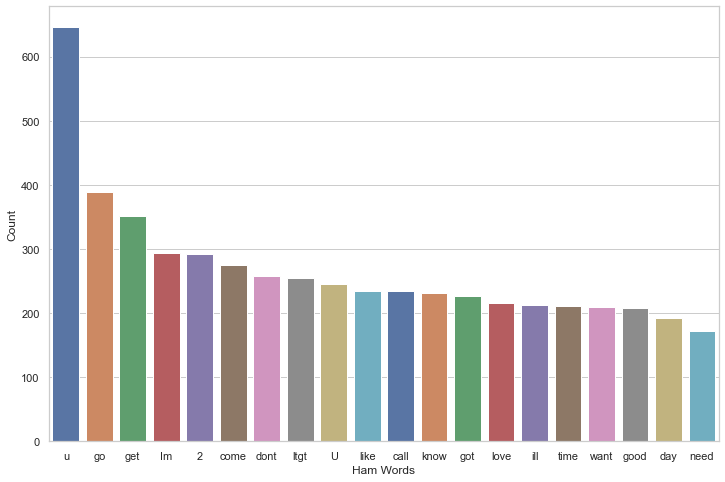

In [30]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
ax=sns.barplot(pd.DataFrame(Counter(hamcorpus).most_common(20))[0],pd.DataFrame(Counter(hamcorpus).most_common(20))[1], palette="deep")
plt.xticks(rotation='horizontal')
ax.set(ylabel = "Count")
ax.set(xlabel = "Ham Words")
plt.show()

# Model

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer( max_features = 3000)
X = cv.fit_transform(df['Message']).toarray()
X.shape

(5157, 3000)

In [32]:
y = df['Category']
y

0       0
1       0
2       1
3       0
4       0
       ..
5152    1
5153    0
5154    0
5155    0
5156    0
Name: Category, Length: 5157, dtype: int64

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Count Vectoriser

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver='lbfgs', max_iter=3000) 

In [36]:
#fitting on cv
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predlr)) # used to measure the quality of predictions from a classification algorithm

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       879
           1       1.00      0.80      0.89       153

    accuracy                           0.97      1032
   macro avg       0.98      0.90      0.94      1032
weighted avg       0.97      0.97      0.97      1032



### Hyperparameter tuning

In [38]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
paramgrid = {"max_depth": [3, None],
            "max_features": randint(1, 9),
            "min_samples_leaf": randint(1, 9),
            "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
treecv = RandomizedSearchCV(tree, paramgrid, cv = 5)

treecv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(treecv.best_params_))
print("Best score is {}".format(treecv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.9495757575757576


In [39]:
besttree=treecv.best_estimator_

In [40]:
ypredtree = besttree.predict(X_test)
print(classification_report(y_test,ypredtree))
print("Precision of DecisionTree for cv",precision_score(y_test,ypredtree))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       879
           1       0.82      0.67      0.74       153

    accuracy                           0.93      1032
   macro avg       0.88      0.82      0.85      1032
weighted avg       0.93      0.93      0.93      1032

Precision of DecisionTree for cv 0.824


In [41]:
mnb.fit(X_train,y_train)
y_predmnb = mnb.predict(X_test)
print(classification_report(y_test, y_predmnb)) # used to measure the quality of predictions from a classification algorithm

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       879
           1       0.90      0.90      0.90       153

    accuracy                           0.97      1032
   macro avg       0.94      0.94      0.94      1032
weighted avg       0.97      0.97      0.97      1032



In [42]:
gnb.fit(X_train,y_train)
y_predgnb = gnb.predict(X_test)
print(classification_report(y_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       879
           1       0.52      0.84      0.64       153

    accuracy                           0.86      1032
   macro avg       0.74      0.85      0.78      1032
weighted avg       0.90      0.86      0.87      1032



In [43]:
bnb.fit(X_train,y_train)
y_predbnb = bnb.predict(X_test)
print(classification_report(y_test, y_predbnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       879
           1       0.99      0.85      0.92       153

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [44]:
 #cv
print("Precision of MNB for cv",precision_score(y_test,y_predmnb))
print("Precision of GNB for cv",precision_score(y_test,y_predgnb))
print("Precision of BNB for cv",precision_score(y_test,y_predbnb))
print("Precision of LR for cv",precision_score(y_test,y_predlr))

Precision of MNB for cv 0.9019607843137255
Precision of GNB for cv 0.5182186234817814
Precision of BNB for cv 0.9923664122137404
Precision of LR for cv 1.0


# Optimisation

In [45]:
Xa=np.hstack((X,df['charcount'].values.reshape(-1,1)))
Xa.shape

(5157, 3001)

In [46]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, y, test_size=0.2)

In [47]:
lr.fit(Xa_train, ya_train)
ya_predlr = lr.predict(Xa_test)

In [48]:
print(classification_report(ya_test, ya_predlr)) # used to measure the quality of predictions from a classification algorithm

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       0.97      0.90      0.93       132

    accuracy                           0.98      1032
   macro avg       0.98      0.95      0.96      1032
weighted avg       0.98      0.98      0.98      1032



# Tfidf

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features = 3000)
T = tv.fit_transform(df['Message']).toarray()
T_train, T_test, yt_train, yt_test = train_test_split(T, y, test_size=0.2)

In [50]:
#fitting of tfidf
lr.fit(T_train, yt_train)
yt_predlr = lr.predict(T_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(yt_test, yt_predlr)) # used to measure the quality of predictions from a classification algorithm

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       900
           1       1.00      0.68      0.81       132

    accuracy                           0.96      1032
   macro avg       0.98      0.84      0.89      1032
weighted avg       0.96      0.96      0.96      1032



In [52]:
mnb.fit(T_train,yt_train)
yt_predmnb = mnb.predict(T_test)
print(classification_report(yt_test, yt_predmnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       1.00      0.83      0.91       132

    accuracy                           0.98      1032
   macro avg       0.99      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [53]:
gnb.fit(T_train,yt_train)
yt_predgnb = gnb.predict(T_test)
print(classification_report(yt_test, yt_predgnb))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       900
           1       0.54      0.88      0.67       132

    accuracy                           0.89      1032
   macro avg       0.76      0.88      0.80      1032
weighted avg       0.92      0.89      0.90      1032



In [54]:
bnb.fit(T_train,yt_train)
yt_predbnb = bnb.predict(T_test)
print(classification_report(yt_test, yt_predbnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       1.00      0.87      0.93       132

    accuracy                           0.98      1032
   macro avg       0.99      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



In [55]:
#tfidf
print("Precision of MNB for tfidf",precision_score(yt_test,yt_predmnb))
print("Precision of GNB for tfidf",precision_score(yt_test,yt_predgnb))
print("Precision of BNB for tfidf",precision_score(yt_test,yt_predbnb))
print("Precision of LR for tfidf",precision_score(yt_test,yt_predlr))

Precision of MNB for tfidf 1.0
Precision of GNB for tfidf 0.5395348837209303
Precision of BNB for tfidf 1.0
Precision of LR for tfidf 1.0


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
estimators=[('mnb', mnb), ('lr', lr),('bnb', bnb),('gnb', gnb)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(T_train,yt_train)
ye_pred = clf.predict(T_test)
print("Precision",precision_score(yt_test,ye_pred))

Precision 0.9763779527559056


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
etc = ExtraTreesClassifier(n_estimators=35, random_state=3)
gbdt = GradientBoostingClassifier(n_estimators=35,random_state=2)
xgb = XGBClassifier(n_estimators=35,random_state=3)

In [61]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb', mnb), ('lr', lr),('bnb', bnb),('gnb', gnb),('etc', etc),('gbdt', gbdt),('xgb',xgb)],voting='soft')
voting.fit(T_train,yt_train)
ygrp_pred = voting.predict(T_test)
print("Precision",precision_score(yt_test,ygrp_pred))

Precision 1.0


# Pickling

In [63]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))